# **Importing Required Libraries**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# **Uploading the Dataset**

In [ ]:
df = pd.read_csv('/content/insurance[1].csv')
df.head(5)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


# **Data Preprocessing**

In [ ]:
le_sex = LabelEncoder()
le_smoker = LabelEncoder()
le_region = LabelEncoder()

df["sex"] = le_sex.fit_transform(df["sex"])
df["smoker"] = le_smoker.fit_transform(df["smoker"])
df["region"] = le_region.fit_transform(df["region"])

X = df.drop("charges", axis=1)
y = df["charges"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# **Data Modeling**

In [ ]:
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

print(f"Coefficients: {lr_model.coef_}")
print(f"Intercept: {lr_model.intercept_}")


Coefficients: [ 3.61610865e+03 -9.39295411e+00  2.02830858e+03  5.16662566e+02
  9.55714338e+03 -3.02387980e+02]
Intercept: 13346.089736364485


# **Model Prediction and Evalution**

In [ ]:

y_pred = lr_model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse:.2f}")
print(f"R² Score: {r2:.2f}")


Mean Squared Error: 33635210.43
R² Score: 0.78


# **Visualizing the Prediction**

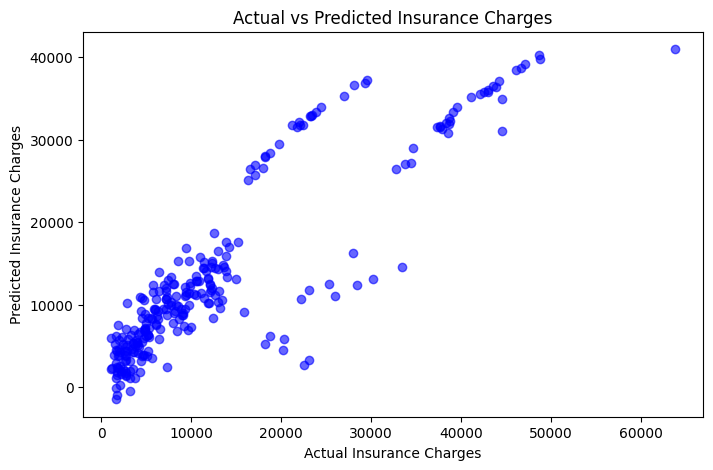

In [ ]:
plt.figure(figsize=(8, 5))
plt.scatter(y_test, y_pred, color="blue", alpha=0.6)
plt.xlabel("Actual Insurance Charges")
plt.ylabel("Predicted Insurance Charges")
plt.title("Actual vs Predicted Insurance Charges")
plt.show()